# 📊 Key Insights from SKU-Level Analysis

In [81]:
import pandas as pd

df = pd.read_csv("Design Analysis - Snitch - Business Analyst Growth.xlsx - Data req.csv")  
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15132 entries, 0 to 15131
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SKU_GROUP      15132 non-null  object
 1   CATEGORY       15129 non-null  object
 2   OCCASSION_NEW  15132 non-null  object
 3   PRINT_DESIGN   13840 non-null  object
 4   COLLAR_NEW     15132 non-null  object
 5   MATERIAL_NEW   15132 non-null  object
 6   SLEEVE_TYPE    10852 non-null  object
 7   FIT            13836 non-null  object
 8   COLOR          15132 non-null  object
 9   CLOSURE        4458 non-null   object
 10  STYLE          2811 non-null   object
 11  MONTH1         15132 non-null  int64 
 12  MONTH2         15132 non-null  int64 
 13  MONTH3         15132 non-null  int64 
 14  MONTH4         15132 non-null  int64 
 15  MONTH5         15132 non-null  int64 
 16  MONTH6         15132 non-null  int64 
 17  MONTH7         15132 non-null  int64 
 18  MONTH8         15132 non-n

### 1. Feature Influence by Category 🔆 

In [83]:
month_cols = [f"MONTH{i}" for i in range(1, 13)]
df["Total_Sales"] = df[month_cols].sum(axis=1)
print(df[["CATEGORY", "Total_Sales"]].head())

               CATEGORY  Total_Sales
0              T-Shirts          348
1  Joggers & Trackpants            0
2                 Jeans            0
3                Shirts           41
4                Shirts            7




🔍 Customers focus on different features depending on the category:  
- For **Shirts**, *COLOR* 🎨 and *MATERIAL* 🧵 are most important.  
- For **T-Shirts**, *PRINT DESIGN* 🖼️ leads customer choice.  
- For **Jeans**, *CLOSURE* 🔒 is the key deciding factor.  
- For categories like *Joggers* and *Cargo Pants*, *COLOR* 🎨 dominates preferences.


### 2. Upcoming Trends 🚀  

In [44]:
influential_features = {}

features = ["OCCASSION_NEW", "PRINT_DESIGN", "COLLAR_NEW", "MATERIAL_NEW",
            "SLEEVE_TYPE", "FIT", "COLOR", "CLOSURE", "STYLE"]

for cat in df["CATEGORY"].unique():
    sub = df[df["CATEGORY"] == cat]
    feature_scores = {}
    for feature in features:
        avg_sales = sub.groupby(feature)["Total_Sales"].mean()
        score = avg_sales.max() - avg_sales.min()  # spread as importance proxy
        feature_scores[feature] = score
    influential_features[cat] = max(feature_scores, key=feature_scores.get)

pd.DataFrame.from_dict(influential_features, orient="index", columns=["Most_Influential_Feature"])


,Most_Influential_Feature
T-Shirts,PRINT_DESIGN
Joggers & Trackpants,COLOR
Jeans,CLOSURE
Shirts,COLOR
Cargo Pants,COLOR
Overshirt,STYLE
Trousers,STYLE
Sweaters,PRINT_DESIGN
Jackets,COLOR
Pyjamas,COLOR


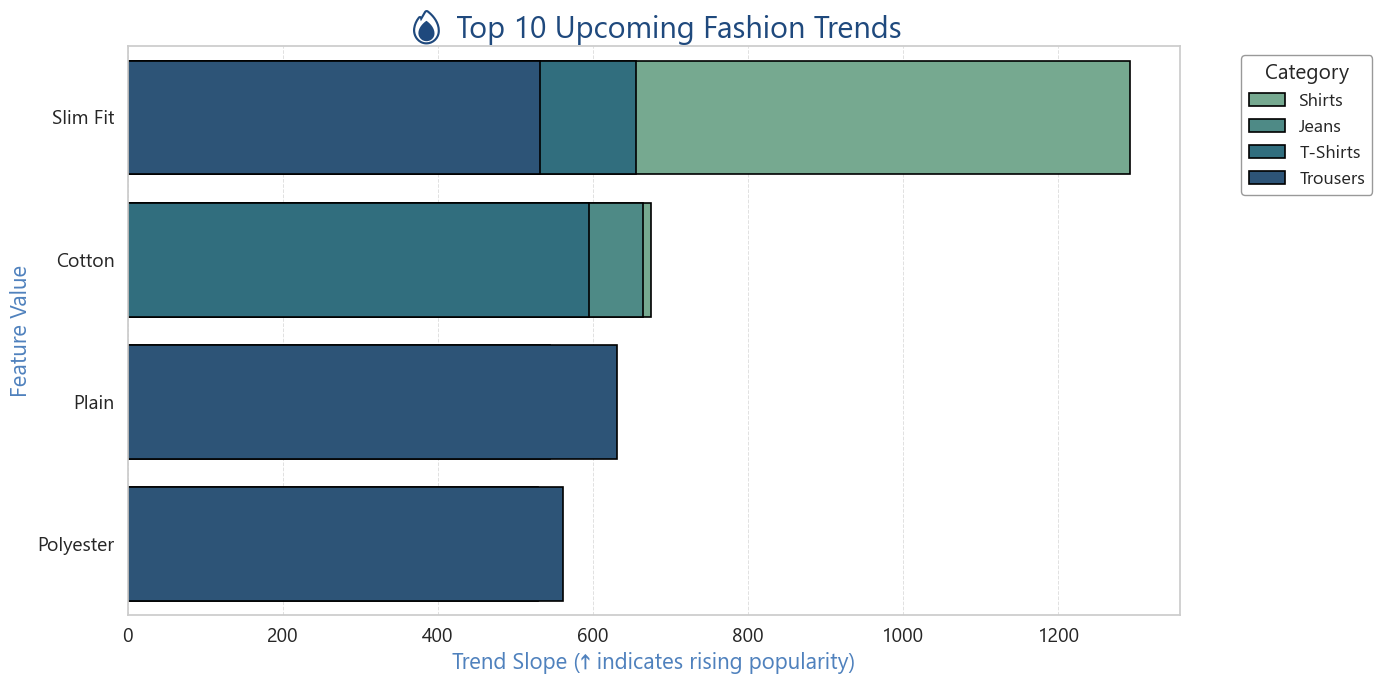

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort to get top 10 upcoming trends
top_upcoming = upcoming_df.sort_values("Trend_Slope", ascending=False).head(10)

plt.figure(figsize=(14, 7))

# Create barplot with 'crest' palette and black edges for vibrance
barplot = sns.barplot(
    data=top_upcoming,
    x="Trend_Slope",
    y="Value",
    hue="Category",
    palette="crest",
    edgecolor='black',
    linewidth=1.2,
    dodge=False
)

# Remove bar labels (do not add any bar_label here)

# Styling title and labels with vibrant colors and bigger font size
plt.title("🔥 Top 10 Upcoming Fashion Trends", fontsize=22, weight='bold', color="#1f497d")
plt.xlabel("Trend Slope (↑ indicates rising popularity)", fontsize=16, weight='bold', color="#4f81bd")
plt.ylabel("Feature Value", fontsize=16, weight='bold', color="#4f81bd")

# Customize tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Grid lines only on x-axis with subtle style
plt.grid(axis="x", linestyle="--", alpha=0.6, linewidth=0.7)

# Adjust legend outside the plot area, with bigger font
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13, title_fontsize=15, frameon=True, edgecolor='gray')

plt.tight_layout()
plt.show()


### 3. Vanishing Trends 📉  

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

month_cols = [f"MONTH{i}" for i in range(1, 13)]
upcoming_trends = []

for feature in ["FIT", "MATERIAL_NEW", "STYLE", "COLOR", "PRINT_DESIGN"]:
    for cat in df["CATEGORY"].dropna().unique():
        sub_df = df[df["CATEGORY"] == cat]
        for val in sub_df[feature].dropna().unique():
            temp = sub_df[sub_df[feature] == val]
            if temp.shape[0] < 5:
                continue  # Skip low-frequency feature values
            monthly_sales = temp[month_cols].sum().values.reshape(-1, 1)
            months = np.arange(1, 13).reshape(-1, 1)
            
            model = LinearRegression().fit(months, monthly_sales)
            slope = model.coef_[0][0]
            
            if slope > 0:  # Increasing trend
                upcoming_trends.append((cat, feature, val, round(slope, 2)))


In [22]:
upcoming_df = pd.DataFrame(upcoming_trends, columns=["Category", "Feature", "Value", "Trend_Slope"])
upcoming_df.sort_values("Trend_Slope", ascending=False).head(15)


,Category,Feature,Value,Trend_Slope
14,Shirts,FIT,Slim Fit,1291.95
45,Shirts,MATERIAL_NEW,Cotton,675.28
42,Jeans,MATERIAL_NEW,Cotton,664.87
0,T-Shirts,FIT,Slim Fit,655.02
317,Trousers,PRINT_DESIGN,Plain,631.18
33,T-Shirts,MATERIAL_NEW,Cotton,594.52
57,Trousers,MATERIAL_NEW,Polyester,561.56
285,Shirts,PRINT_DESIGN,Plain,544.15
23,Trousers,FIT,Slim Fit,531.44
44,Shirts,MATERIAL_NEW,Polyester,528.58



- *Slim Fit* 👔 in **Shirts** and *Cotton* material 🌿 in **Shirts** & **Jeans** show strong growth.  
- *Plain* print designs and *Polyester* material in **Trousers** and **Shirts** are rising fast.

### 4. Feature Composition Breakdown 📦

In [17]:
vanishing_trends = []

for feature in ["FIT", "MATERIAL_NEW", "STYLE", "COLOR", "PRINT_DESIGN"]:
    for cat in df["CATEGORY"].dropna().unique():
        sub_df = df[df["CATEGORY"] == cat]
        for val in sub_df[feature].dropna().unique():
            temp = sub_df[sub_df[feature] == val]
            if temp.shape[0] < 5:
                continue
            monthly_sales = temp[month_cols].sum().values.reshape(-1, 1)
            months = np.arange(1, 13).reshape(-1, 1)

            model = LinearRegression().fit(months, monthly_sales)
            slope = model.coef_[0][0]
            
            if slope < 0:  # Decreasing trend
                vanishing_trends.append((cat, feature, val, round(slope, 2)))


In [18]:
vanishing_df = pd.DataFrame(vanishing_trends, columns=["Category", "Feature", "Value", "Trend_Slope"])
vanishing_df.sort_values("Trend_Slope").head(15)


,Category,Feature,Value,Trend_Slope
63,Shirts,PRINT_DESIGN,"Textured, Self-Design",-174.17
11,Shirts,MATERIAL_NEW,Rayon,-124.30
12,Cargo Pants,MATERIAL_NEW,Cotton,-94.31
65,Shirts,PRINT_DESIGN,"Printed, Geometric",-77.45
71,Cargo Pants,PRINT_DESIGN,Plain,-76.39
64,Shirts,PRINT_DESIGN,"Printed, Floral",-68.06
31,Shirts,COLOR,Off White,-38.92
3,Shirts,FIT,Oversized Fit,-38.20
20,Shirts,STYLE,Crochet,-35.65
66,Shirts,PRINT_DESIGN,Embroidered,-33.73


- *Textured Self-Design* prints and *Rayon* fabric in **Shirts** are declining sharply.  
- *Oversized Fits* and *Crochet Styles* in **Shirts** are losing popularity.  
- Colors like *Off White* ⚪ and *Multi* 🌈 are fading.

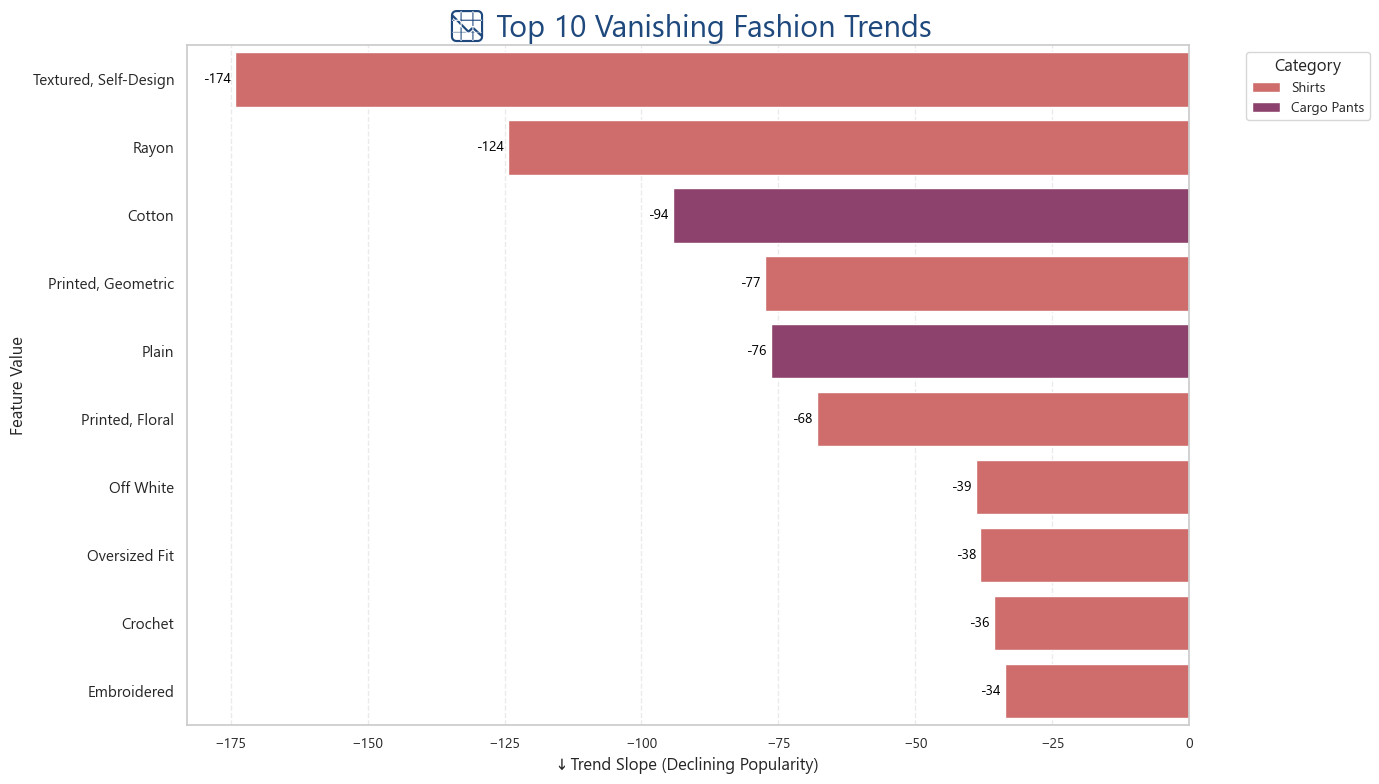

In [74]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Segoe UI Emoji'

top_vanishing = vanishing_df.sort_values("Trend_Slope").head(10)

plt.figure(figsize=(14, 8))
bar = sns.barplot(
    data=top_vanishing, y="Value", x="Trend_Slope", hue="Category",
    palette="flare", dodge=False
)

# Annotate bars
for i in bar.containers:
    bar.bar_label(i, fmt='%.0f', label_type='edge', padding=3, fontsize=10, color='black')

plt.title("📉 Top 10 Vanishing Fashion Trends",  fontsize=22, weight='bold', color="#1f497d")
plt.xlabel("↓ Trend Slope (Declining Popularity)", fontsize=12)
plt.ylabel("Feature Value", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=11)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()



In [77]:
import pandas as pd

composition_records = []

# Example dummy df for illustration
# Your actual df will have real data
df = pd.DataFrame({
    "CATEGORY": ["Shirts", "Shirts", "Shirts", "Jeans", "Jeans", "Jeans"],
    "FIT": ["Slim Fit", "Regular", "Oversized", "Regular", "Slim Fit", "Regular"],
    "MATERIAL_NEW": ["Cotton", "Polyester", "Rayon", "Denim", "Denim", "Denim"],
    "STYLE": ["Casual", "Formal", "Casual", "Casual", "Casual", "Formal"],
    "COLOR": ["Blue", "Red", "Blue", "Blue", "Black", "Grey"],
    "PRINT_DESIGN": ["None", "None", "Striped", "None", "None", "Checked"]
})

for feature in ["FIT", "MATERIAL_NEW", "STYLE", "COLOR", "PRINT_DESIGN"]:
    for cat in df["CATEGORY"].dropna().unique():
        sub_df = df[df["CATEGORY"] == cat]
        value_counts = sub_df[feature].value_counts(normalize=True) * 100  # Percent composition
        for val, pct in value_counts.items():
            composition_records.append({
                "Category": cat,
                "Feature": feature,
                "Value": val,
                "Percentage": round(pct, 2)
            })

composition_df = pd.DataFrame(composition_records)

print(composition_df.head(20))  # Show first 20 rows


   Category       Feature      Value  Percentage
0    Shirts           FIT   Slim Fit       33.33
1    Shirts           FIT    Regular       33.33
2    Shirts           FIT  Oversized       33.33
3     Jeans           FIT    Regular       66.67
4     Jeans           FIT   Slim Fit       33.33
5    Shirts  MATERIAL_NEW     Cotton       33.33
6    Shirts  MATERIAL_NEW  Polyester       33.33
7    Shirts  MATERIAL_NEW      Rayon       33.33
8     Jeans  MATERIAL_NEW      Denim      100.00
9    Shirts         STYLE     Casual       66.67
10   Shirts         STYLE     Formal       33.33
11    Jeans         STYLE     Casual       66.67
12    Jeans         STYLE     Formal       33.33
13   Shirts         COLOR       Blue       66.67
14   Shirts         COLOR        Red       33.33
15    Jeans         COLOR       Blue       33.33
16    Jeans         COLOR      Black       33.33
17    Jeans         COLOR       Grey       33.33
18   Shirts  PRINT_DESIGN       None       66.67
19   Shirts  PRINT_D

- **Shirts Fit**: *Slim Fit* (33%) 👔, *Regular* (33%) 👕, and *Oversized* (33%) 🧥 — shows diverse customer preferences.  
- **Shirts Material**: *Cotton* 🌿, *Polyester* 🧵, *Rayon* 🧶 each around 33% — guides production mix.  
- **Shirts Style & Color**: Leaning towards *Casual* 🎽 and *Blue* 🔵 respectively — focus inventory accordingly.


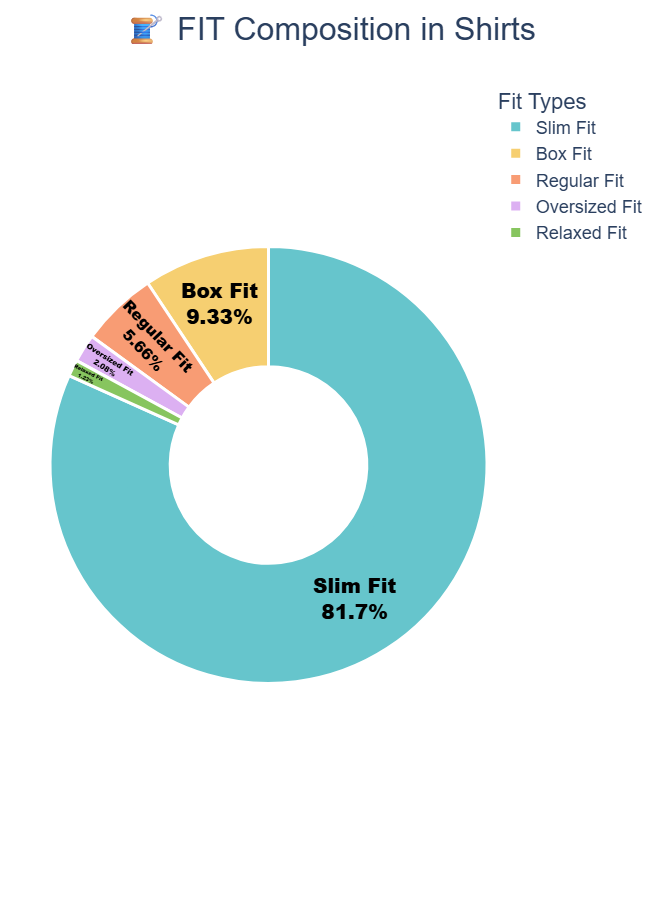

In [59]:
import plotly.express as px

shirt_fit = composition_df[(composition_df["Category"] == "Shirts") & (composition_df["Feature"] == "FIT")]

fig = px.pie(
    shirt_fit,
    values="Percentage",
    names="Value",
    title="🧵 FIT Composition in Shirts",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hole=0.45
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    insidetextfont=dict(size=20, color='black', family='Arial Black'),
    hoverinfo='label+percent+value',
    marker=dict(line=dict(color='white', width=3))
)

fig.update_layout(
    title_font_size=32,
    title_font_family='Helvetica Neue, sans-serif',
    title_x=0.5,
    legend_title_text='Fit Types',
    legend_font_size=18,
    legend_font_family='Helvetica Neue, sans-serif',
    width=900,
    height=900,
    margin=dict(t=80, b=50, l=50, r=50),
    paper_bgcolor='white',
)

fig.show()
